## Introduction

In this assignment,we implement the k-means algo for image compression by reducing the number of colors that occur in an image to only those that are most common in the image.

## Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#from utils import *

%matplotlib inline

## K-Means Algorithm

### Introduction
- groups similar data points in the training set into a "cohesive" cluster
- k-means starts by guessing the inital centroids, and then refines the guess by:
    - repeateadly assigning examples to the closest centroids, then
    - recompiling the centroids based on new assignments
- pseudocode:
    ```
    # Initialize centroids
    # K is the number of clusters
    centroids = kMeans_init_centroids(X, K)

    for iter in range(iterations):
        # Cluster assignment step: 
        # Assign each data point to the closest centroid. 
        # idx[i] corresponds to the index of the centroid 
        # assigned to example i
        idx = find_closest_centroids(X, centroids)

        # Move centroid step: 
        # Compute means based on centroid assignments
        centroids = compute_means(X, idx, K)
    ```
- k-means will always converge to some final set of means for all centroids
- however, the converged solution may not be ideal and depends on the initial settings of the centroid
    - in pratice, k-means is usually run a few times with different random initializations
    - then, the solution is chosen based on the lowest cost function value
    - thus, for k = 2 to K (k is the number of clusters), run k-means multiple times for each k based on different random inits

### Finding Closest Centroid
- for each training example and location of centroid, output a 1-d array index that holds index of the closest centriod value (a value in {1, .. , k} where k is the total number of centroids)
- calculate the closest centroid based on the squared-distance

In [3]:
# UNQ_C1
# GRADED FUNCTION: find_closest_centroids

def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): k centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    for i in range(X.shape[0]):
          # Array to hold distance between X[i] and each centroids[j]
          distance = [] 
          for j in range(centroids.shape[0]):
              norm_ij = np.linalg.norm(X[i] - centroids[j])
              distance.append(norm_ij)

          idx[i] = np.argmin(distance)

    ### END CODE HERE ###
    
    return idx

Check implementation on sample data:

In [4]:
# Load an example dataset that we will be using
X = np.load("./ex7_X.npy")

In [5]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [8]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

First three elements in idx are: [0 2 1]


### Compute Centroid Mean

After assigning each point to a centroid, now recompte, for each centoid, the mean of the points assigned to it.

In [9]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    ### START CODE HERE ###
    for k in range(K):   
          points = X[idx == k]  
          centroids[k] = np.mean(points, axis = 0)

    ### END CODE HERE ## 
    
    return centroids

Check implementation

In [10]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


### K-Means on Sample Data

Use the above two functions to run k-means on sample data

In [14]:
def draw_line(p1, p2, style="-k", linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth)

def plot_data_points(X, idx):
    # plots data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], c=idx)

In [15]:
def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the examples
    plot_data_points(X, idx)
    
    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    
    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])
    
    plt.title("Iteration number %d" %i)

In [16]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    
    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


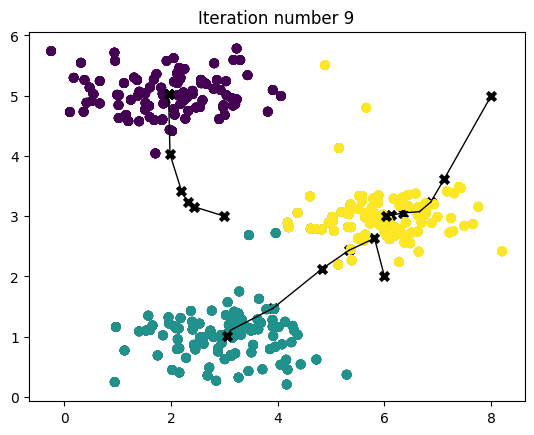

In [17]:
X = np.load("./ex7_X.npy")
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3

# Number of iterations
max_iters = 10

centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

### Random Initialization
- first randomly shuffle the indices of training examples (using np.random.permutations())
- select the first k examples on the random permutation of indices

In [18]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

# Image Compression with K-Means
- In a straightforward 24-bit color representation of an image, each pixed is represented as a 3 8-bit integer (ranging for 0 to 255) that specifies the RGB intensity values. This encoding is referred to as RGB encoding.
- In this exercise, we reduce the number of colors to 16. By making this reduction, it is possible to present (compress) the photo in an efficient way
- Specifically, we only need to store the RGB values of the 16 selected colors. Thus, we use k-means to select the 16 colors. Concretely, we use k-means to find 16 colors that best group the pixels in a 3D RGB space

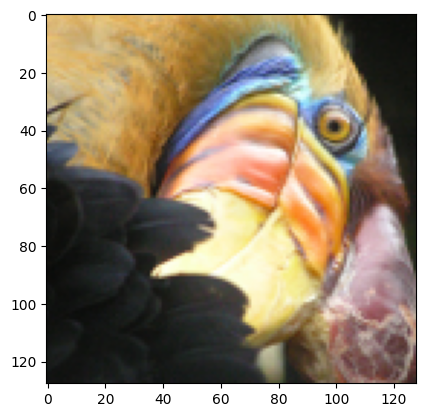

In [19]:
original_img = plt.imread('bird_small.png')
plt.imshow(original_img)

In [20]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


Shape interpretation:
- the first 2 indices indentify a pixel position
- the 3rd index represents RGB (red = 0, green = 1, blue = 2)
- for example, orig_image[50, 33, 2] gives blue intensity for pixel at row=50 and col=33
- each pixel has a RGB value

Now, transform the original image to a 2D matrix. Create a m X 3 matrix of pixel colors (where m = 128 * 128 pixels = 16384). Thus, each row will contain a RGB pixel value

In [21]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

Run K-means on image pixels:

In [22]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16                       
max_iters = 10               

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K) 

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters) 

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


In [23]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [1 4 4 4 1]


After finding the top k = 16 colors to represent the image, you can now assign each pixel position to its closest centroid using the find_closest_centroid function

In [24]:
# Represent image in terms of indices
X_recovered = centroids[idx, :] 

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

Finally, view the effecr of compression by reconstructing the image based only on centroid assignments - specifically, replace each pixel location by the mean of the centroid assigned to it

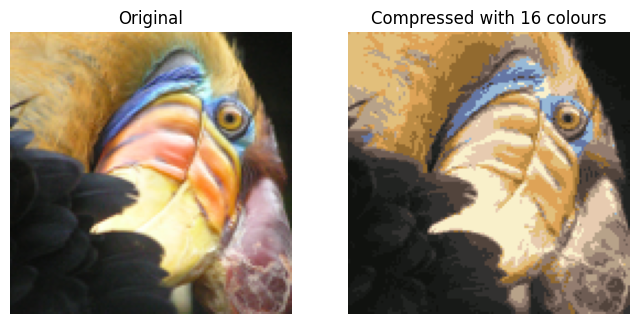

In [25]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()